In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# [i] reading data from file

path = 'people.txt'
df = pd.read_table(path, sep=',', header=0)
df

,age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3
5,55,adult,9.0,single,-5
6,200,child,3.0,married,0
7,18,adult,5.7,married,20
8,221,elderly,5.0,widowed,2
9,34,child,-7.0,married,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           10 non-null     int64  
 1   agegroup      10 non-null     object 
 2   height        10 non-null     float64
 3   status        10 non-null     object 
 4   yearsmarried  10 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 528.0+ bytes


In [11]:
# [ii] Ruleset definition

def E(row):
    errorlist = []

    #rule 1
    if not (0 <= row['age'] <= 150):
        errorlist.append('age should be in range 0-150')

    #rule 2
    if not(row['age'] > row['yearsmarried']):
        errorlist.append('age should be greater than years married')

    #rule 3
    if row['status'] not in ['single','married','widowed']:
        errorlist.append("status must be 'single' or 'married' or 'widowed'")

    #rule 4
    #expected_agegroup = ''
    if row['age'] < 18:
        expected_agegroup = 'child'
    elif 18 <= row['age'] < 65:
        expected_agegroup = 'adult'
    else:
        expected_agegroup = 'elderly'

    if row['agegroup'] != expected_agegroup:
        errorlist.append(f"expected age group:'{expected_agegroup}', received: '{row['agegroup']}'")

    return errorlist

In [12]:
# [iii] Applying Rulset to check for rule violations
df['ERRORS'] = df.apply(E, axis=1)
df

,age,agegroup,height,status,yearsmarried,ERRORS
0,21,adult,6.0,single,-1,[]
1,2,child,3.0,married,0,[]
2,18,adult,5.7,married,20,[age should be greater than years married]
3,221,elderly,5.0,widowed,2,[age should be in range 0-150]
4,34,child,-7.0,married,3,"[expected age group:'adult', received: 'child']"
5,55,adult,9.0,single,-5,[]
6,200,child,3.0,married,0,"[age should be in range 0-150, expected age gr..."
7,18,adult,5.7,married,20,[age should be greater than years married]
8,221,elderly,5.0,widowed,2,[age should be in range 0-150]
9,34,child,-7.0,married,3,"[expected age group:'adult', received: 'child']"


In [13]:
# [iv] data summarization

vio = df[df['ERRORS'].apply(lambda x: len(x) > 0)]
vio

,age,agegroup,height,status,yearsmarried,ERRORS
2,18,adult,5.7,married,20,[age should be greater than years married]
3,221,elderly,5.0,widowed,2,[age should be in range 0-150]
4,34,child,-7.0,married,3,"[expected age group:'adult', received: 'child']"
6,200,child,3.0,married,0,"[age should be in range 0-150, expected age gr..."
7,18,adult,5.7,married,20,[age should be greater than years married]
8,221,elderly,5.0,widowed,2,[age should be in range 0-150]
9,34,child,-7.0,married,3,"[expected age group:'adult', received: 'child']"


age should be in range 0-150                       3
age should be greater than years married           2
expected age group:'adult', received: 'child'      2
expected age group:'elderly', received: 'child'    1
Name: ERRORS, dtype: int64


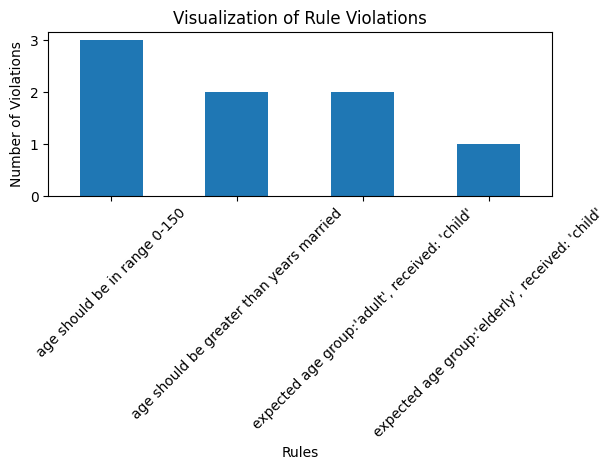

In [14]:
# [v] visualizing the summarizations

# Flatten the list of errors and count occurrences
error_counts = vio['ERRORS'].explode().value_counts()
print(error_counts)

# Plotting
error_counts.plot(kind='bar')
plt.title('Visualization of Rule Violations')
plt.xlabel('Rules')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
